<a href="https://colab.research.google.com/github/asmaayasse/Udacity-/blob/main/BlindNav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# !pip install opencv-python-headless tensorflow keras matplotlib numpy

import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import shutil
from google.colab.patches import cv2_imshow


In [5]:
import os
import shutil

src_dir = '/content/data'
base_train_dir = '/content/data/splitted_data/train'
base_val_dir = '/content/data/splitted_data/val'

for category in os.listdir(src_dir):
    category_path = os.path.join(src_dir, category)

    if os.path.isdir(category_path):
        train_category_path = os.path.join(base_train_dir, category)
        val_category_path = os.path.join(base_val_dir, category)

        os.makedirs(train_category_path, exist_ok=True)
        os.makedirs(val_category_path, exist_ok=True)

        files = os.listdir(category_path)

        split_index = int(0.8 * len(files))
        train_files = files[:split_index]
        val_files = files[split_index:]

        for file in train_files:
            src_path = os.path.join(category_path, file)
            dest_path = os.path.join(train_category_path, file)

            if os.path.isfile(src_path):
                shutil.copy(src_path, dest_path)

        for file in val_files:
            src_path = os.path.join(category_path, file)
            dest_path = os.path.join(val_category_path, file)

            if os.path.isfile(src_path):
                shutil.copy(src_path, dest_path)



In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/data/splitted_data/train'
validation_dir = '/content/data/splitted_data/val'
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Found 684 images belonging to 5 classes.
Found 173 images belonging to 5 classes.


In [7]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

model.save('image_classification_model.keras')

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 5), output.shape=(None, 4)

Please capture an image (or press 'q' to quit).


<IPython.core.display.Javascript object>

Image captured and saved to photo.jpg


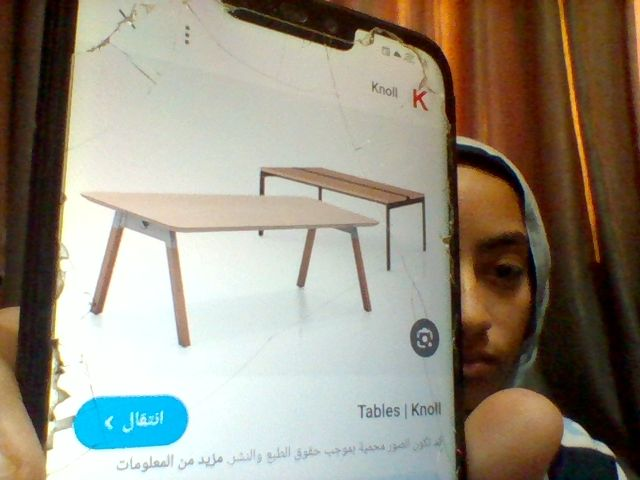

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Predicted class: Tables


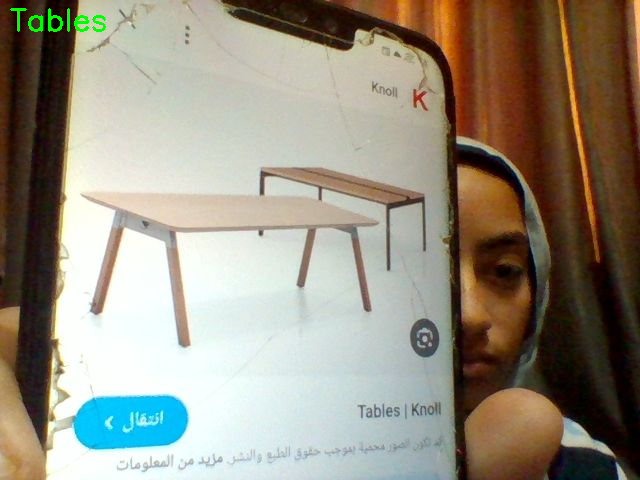

Please capture an image (or press 'q' to quit).


<IPython.core.display.Javascript object>

Exiting.


In [9]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow

model = tf.keras.models.load_model("image_classification_model.keras")
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

categories = {1: "Cars", 2: "Tables", 0: "Stairs"}

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach((track) => track.stop());
        div.remove();

        return canvas.toDataURL('image/jpeg', quality);
    }
    takePhoto({quality: %f});
    ''' % quality)
    display(js)
    data = eval_js('takePhoto(%f)' % quality)
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

while True:
    print("Please capture an image (or press 'q' to quit).")
    try:
        photo = take_photo()
        print(f"Image captured and saved to {photo}")

        img = cv2.imread(photo)
        cv2_imshow(img)

        img_resized = cv2.resize(img, (128, 128))
        img_resized = np.expand_dims(img_resized, axis=0) / 255.0

        predictions = model.predict(img_resized)
        class_idx = np.argmax(predictions[0])
        class_name = categories[class_idx]

        print(f"Predicted class: {class_name}")

        cv2.putText(img, f"{class_name}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        cv2_imshow(img)
    except KeyboardInterrupt:
        print("Exiting.")
        break



In [ ]:
import tensorflow as tf
import numpy as np
import cv2

# Training Data Matrix (Simulation)
train_matrix = {
    "Input": "Training dataset (images and labels)",
    "Preprocessing": "Normalization, Data Augmentation",
    "Model": "Custom CNN Model",
    "Output": "Trained Model",
}

# Predict Data Matrix (Simulation)
predict_matrix = {
    "Input": "Single image for prediction",
    "Preprocessing": "Resize & Normalize",
    "Model": "Trained Model",
    "Output": "Predicted class probabilities",
}

# Print Train and Predict Matrix
print("Training Matrix:")
for key, value in train_matrix.items():
    print(f"{key}: {value}")

print("\nPrediction Matrix:")
for key, value in predict_matrix.items():
    print(f"{key}: {value}")

# Example Prediction Using Trained Model
def predict_image(image_path, model, categories):
    # Load image
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (128, 128)) / 255.0
    img_resized = np.expand_dims(img_resized, axis=0)

    # Predict
    predictions = model.predict(img_resized)
    class_idx = np.argmax(predictions[0])
    class_name = categories[class_idx]

    print(f"Predicted Class: {class_name}")
    return class_name

# Simulate training (you already have your model)
model = tf.keras.models.load_model("image_classification_model.keras")

# Predict using the trained model
categories = {1: "Cars", 2: "Tables", 0: "Stairs"}
image_path = "photo.jpg"  # Example image path
predict_image(image_path, model, categories)


Training Matrix:
Input: Training dataset (images and labels)
Preprocessing: Normalization, Data Augmentation
Model: Custom CNN Model
Output: Trained Model

Prediction Matrix:
Input: Single image for prediction
Preprocessing: Resize & Normalize
Model: Trained Model
Output: Predicted class probabilities
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Predicted Class: Tables


'Tables'

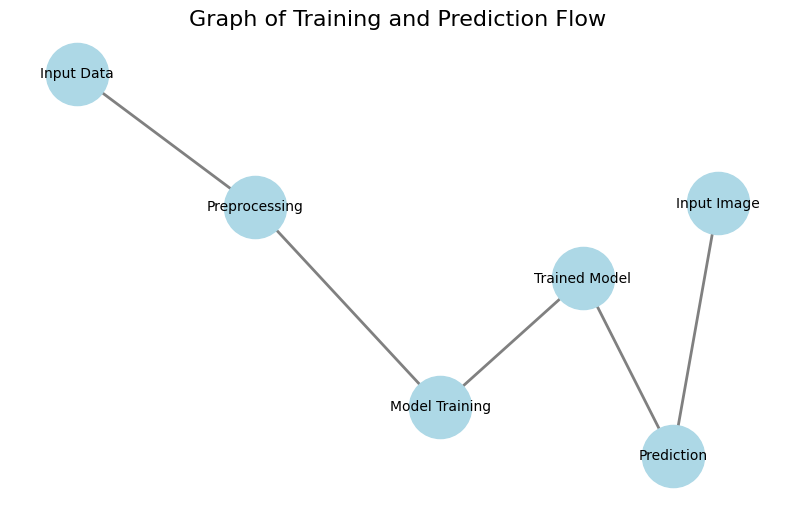

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node("Input Data")
G.add_node("Preprocessing")
G.add_node("Model Training")
G.add_node("Trained Model")
G.add_node("Input Image")
G.add_node("Prediction")

# Add edges for Training
G.add_edge("Input Data", "Preprocessing")
G.add_edge("Preprocessing", "Model Training")
G.add_edge("Model Training", "Trained Model")

# Add edges for Prediction
G.add_edge("Trained Model", "Prediction")
G.add_edge("Input Image", "Prediction")

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # Layout for positioning
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightblue")
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=20, edge_color="gray", width=2)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

plt.title("Graph of Training and Prediction Flow", fontsize=16)
plt.axis("off")
plt.show()


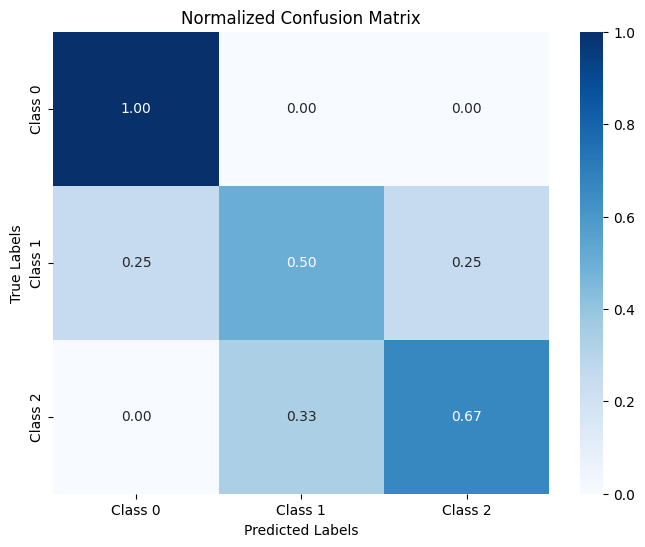

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example data: True labels and predicted labels
true_labels = [0, 1, 1, 2, 0, 1, 2, 2, 0, 1]
predicted_labels = [0, 0, 1, 2, 0, 1, 1, 2, 0, 2]

# Classes in the dataset
class_names = ["Class 0", "Class 1", "Class 2"]

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Normalize the confusion matrix to show percentages (optional)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
